## Imports and working directory configuration

In [6]:
# import plugin to reload automatically changes in the python scripts
%load_ext autoreload
%autoreload 2

# check the current working directory
import os
print(os.getcwd())
%cd '/Users/michal/PycharmProjects/covidout/'

# import external scripts and libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import imageio

import visualisations as vis, ioops, spreading




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/michal/PycharmProjects/covidout
/Users/michal/PycharmProjects/covidout


### IO and short viz

In [8]:
g = ioops.read_net('networks/nod2.csv', 'networks/edg2.csv')

# print(g.nodes(data=True))
# print(g.edges(data=True))


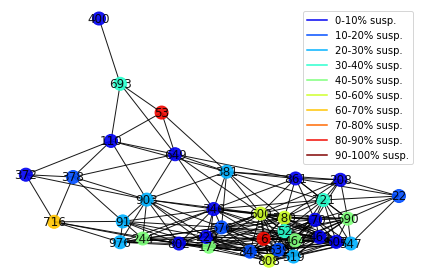

In [9]:

# extract subgraph to plot
_g = vis._filter(g, 649, 2)

pos = nx.spring_layout(_g)
_ = vis.plot(_g, n_labels=True, e_labels=False)


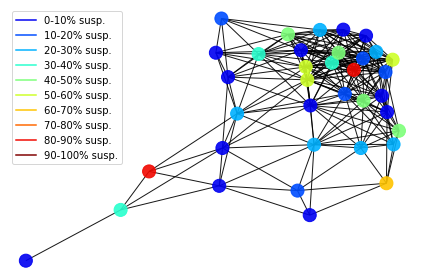

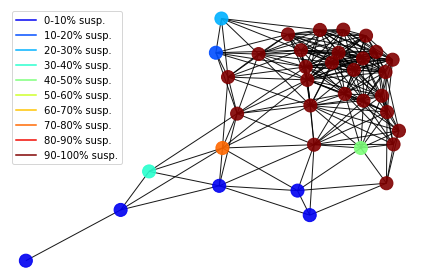

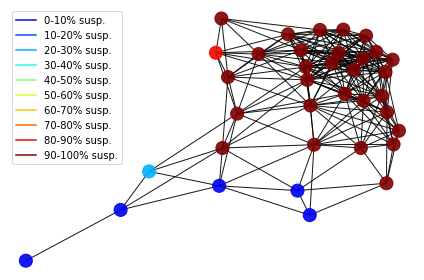

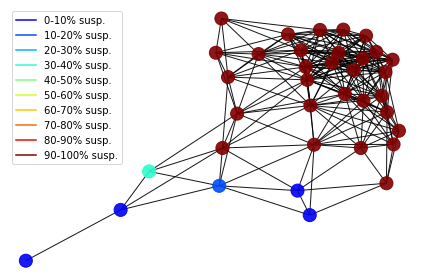

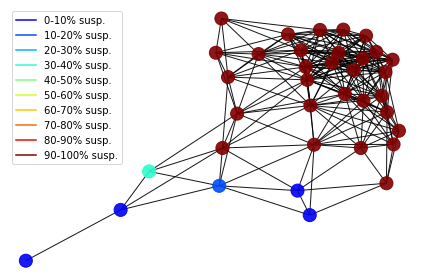

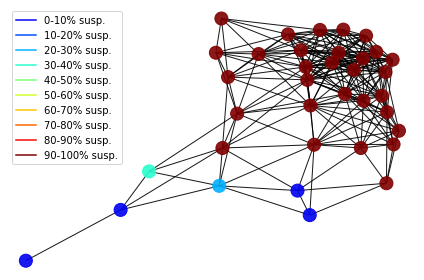

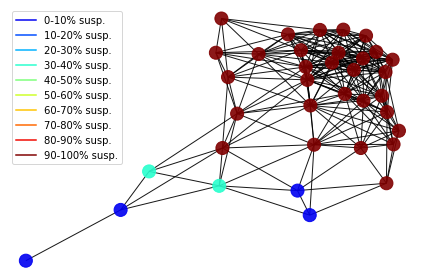

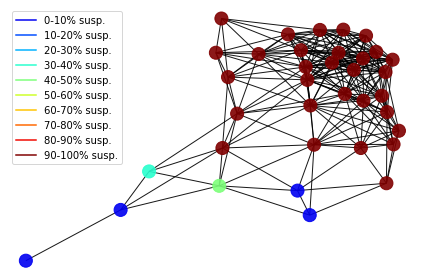

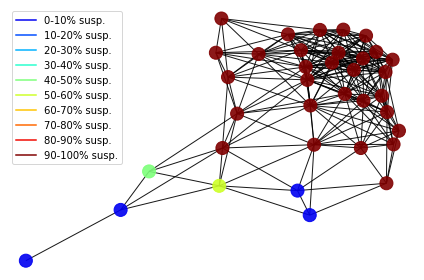

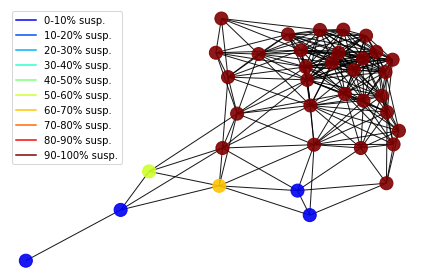

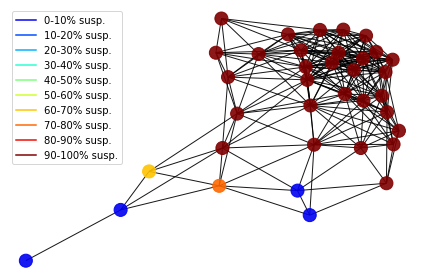

In [11]:
# load network
g = ioops.read_net('networks/nod2.csv', 'networks/edg2.csv')

# extract node to take a close look at and degree of neighbourhood
node_of_interest = 649
ngrhd_degree = 2

# initialse container for images
imgs = []


# plot initial state of network
pos = nx.spring_layout(_g)
_g = vis._filter(g, node_of_interest, ngrhd_degree)
imgs.append(vis.plot(_g, False, False, pos))

# perform propagation in 10 epochs
for i in range(10):
    # propagate
    _ = spreading.sperad(g, node_of_interest)

    # plot initial state of network
    _g = vis._filter(g, node_of_interest, ngrhd_degree)
    imgs.append(vis.plot(_g, False, False, pos))




In [13]:

xdd = []
for img in imgs:
    xdd.append(imageio.imread(img))

imageio.mimsave(os.getcwd() + '/networks/experiment.gif', xdd, duration=.5)

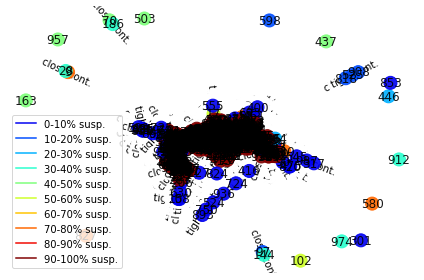

'{"0": 0.9999999999907745, "1": 1.0, "2": 1.0, "3": 1.0, "4": 1.0, "5": 1.882308753309303e-10, "6": 1.0, "7": 1.0, "8": 1.0, "9": 0.7309339685644891, "10": 1.0, "11": 1.0, "12": 1.0, "13": 0.9999993247750313, "14": 0.9999999999989502, "15": 1.0, "16": 0.9999999637716089, "17": 0.5532987297216156, "18": 0.999997851347587, "19": 1.0, "20": 0.9897778881366259, "21": 1.0, "22": 0.9999992496963147, "23": 0.999999999999999, "24": 1.0, "25": 1.0, "26": 0.9999999999999999, "27": 1.0, "28": 0.3277048288024798, "29": 0.9999996690938798, "30": 1.0, "31": 0.9999999771067438, "32": 1.0, "33": 1.0, "34": 0.9999999999999974, "35": 0.9999999980990422, "36": 1.0, "37": 1.0, "38": 1.0, "39": 1.0, "40": 0.9999998708348288, "41": 1.0, "42": 1.0, "43": 1.1257689958021899e-07, "44": 1.0, "45": 0.9979222545973189, "46": 1.0, "47": 1.0, "48": 1.0, "49": 0.9999999884418098, "50": 0.9999999999914732, "51": 1.0, "52": 1.0, "53": 0.6033761822053982, "54": 1.0, "55": 1.0, "56": 1.0, "57": 1.0, "58": 0.999999999999

In [91]:
#for n in g.nodes():
vis.plot(g, 2, 5)
ioops.get_node_states(g)